In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

In [2]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import math
import numpy as np
import matplotlib.pyplot as plt
import logging 
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples {}".format(num_train_examples))
print("Number if test examples {}".format(num_test_examples))

Number of training examples 60000
Number if test examples 10000


In [5]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images,labels
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

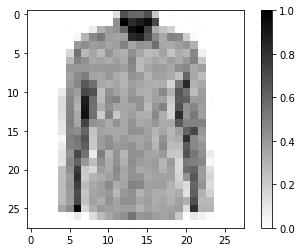

In [6]:
for image, label in test_dataset.take(3):
    break
image = image.numpy().reshape(28,28)
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

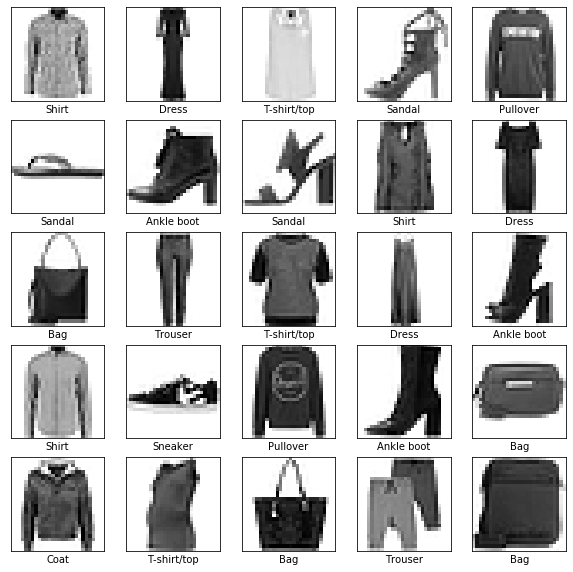

In [6]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)), 
    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
BATCH_SIZE=32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Train for 1875 steps
Epoch 1/5


1471/1875 [======================>.......] - ETA: 7:23:11 - loss: 2.4763 - accuracy: 0.031 - ETA: 1:13:57 - loss: 2.2270 - accuracy: 0.229 - ETA: 34:07 - loss: 1.8977 - accuracy: 0.3462  - ETA: 22:10 - loss: 1.6892 - accuracy: 0.428 - ETA: 17:04 - loss: 1.5476 - accuracy: 0.473 - ETA: 13:52 - loss: 1.4325 - accuracy: 0.507 - ETA: 11:23 - loss: 1.3304 - accuracy: 0.540 - ETA: 9:39 - loss: 1.2445 - accuracy: 0.570 - ETA: 8:32 - loss: 1.2047 - accuracy: 0.57 - ETA: 7:39 - loss: 1.1714 - accuracy: 0.59 - ETA: 7:18 - loss: 1.1572 - accuracy: 0.59 - ETA: 6:32 - loss: 1.1114 - accuracy: 0.61 - ETA: 5:56 - loss: 1.0774 - accuracy: 0.62 - ETA: 5:25 - loss: 1.0488 - accuracy: 0.63 - ETA: 4:56 - loss: 1.0195 - accuracy: 0.64 - ETA: 4:34 - loss: 0.9920 - accuracy: 0.65 - ETA: 4:13 - loss: 0.9671 - accuracy: 0.66 - ETA: 3:59 - loss: 0.9458 - accuracy: 0.67 - ETA: 3:43 - loss: 0.9314 - accuracy: 0.67 - ETA: 3:31 - loss: 0.9172 - accuracy: 0.68 - ETA: 3:19 - loss: 0.9005 - accuracy: 0.68 - ETA: 3:09 

1875/1875 [==============================] - ETA: 6s - loss: 0.5161 - accuracy: 0.81 - ETA: 6s - loss: 0.5155 - accuracy: 0.81 - ETA: 6s - loss: 0.5149 - accuracy: 0.81 - ETA: 5s - loss: 0.5141 - accuracy: 0.81 - ETA: 5s - loss: 0.5135 - accuracy: 0.81 - ETA: 5s - loss: 0.5128 - accuracy: 0.81 - ETA: 5s - loss: 0.5125 - accuracy: 0.81 - ETA: 5s - loss: 0.5123 - accuracy: 0.81 - ETA: 5s - loss: 0.5116 - accuracy: 0.82 - ETA: 5s - loss: 0.5110 - accuracy: 0.82 - ETA: 4s - loss: 0.5110 - accuracy: 0.82 - ETA: 4s - loss: 0.5101 - accuracy: 0.82 - ETA: 4s - loss: 0.5098 - accuracy: 0.82 - ETA: 4s - loss: 0.5088 - accuracy: 0.82 - ETA: 4s - loss: 0.5084 - accuracy: 0.82 - ETA: 4s - loss: 0.5079 - accuracy: 0.82 - ETA: 4s - loss: 0.5074 - accuracy: 0.82 - ETA: 3s - loss: 0.5071 - accuracy: 0.82 - ETA: 3s - loss: 0.5062 - accuracy: 0.82 - ETA: 3s - loss: 0.5058 - accuracy: 0.82 - ETA: 3s - loss: 0.5053 - accuracy: 0.82 - ETA: 3s - loss: 0.5048 - accuracy: 0.82 - ETA: 3s - loss: 0.5043 - accura

1518/1875 [=======================>......] - ETA: 24s - loss: 0.2906 - accuracy: 0.843 - ETA: 12s - loss: 0.3865 - accuracy: 0.881 - ETA: 13s - loss: 0.4627 - accuracy: 0.856 - ETA: 12s - loss: 0.4329 - accuracy: 0.866 - ETA: 12s - loss: 0.4026 - accuracy: 0.875 - ETA: 12s - loss: 0.4131 - accuracy: 0.867 - ETA: 12s - loss: 0.3991 - accuracy: 0.874 - ETA: 12s - loss: 0.3887 - accuracy: 0.879 - ETA: 12s - loss: 0.3753 - accuracy: 0.882 - ETA: 12s - loss: 0.3864 - accuracy: 0.876 - ETA: 12s - loss: 0.3849 - accuracy: 0.875 - ETA: 11s - loss: 0.3915 - accuracy: 0.872 - ETA: 11s - loss: 0.3879 - accuracy: 0.873 - ETA: 11s - loss: 0.3856 - accuracy: 0.872 - ETA: 11s - loss: 0.3881 - accuracy: 0.872 - ETA: 11s - loss: 0.3802 - accuracy: 0.874 - ETA: 11s - loss: 0.3791 - accuracy: 0.874 - ETA: 11s - loss: 0.3786 - accuracy: 0.873 - ETA: 11s - loss: 0.3802 - accuracy: 0.872 - ETA: 11s - loss: 0.3783 - accuracy: 0.872 - ETA: 11s - loss: 0.3776 - accuracy: 0.871 - ETA: 11s - loss: 0.3800 - accur

1875/1875 [==============================] - ETA: 2s - loss: 0.3779 - accuracy: 0.86 - ETA: 2s - loss: 0.3776 - accuracy: 0.86 - ETA: 2s - loss: 0.3775 - accuracy: 0.86 - ETA: 2s - loss: 0.3774 - accuracy: 0.86 - ETA: 2s - loss: 0.3773 - accuracy: 0.86 - ETA: 2s - loss: 0.3766 - accuracy: 0.86 - ETA: 2s - loss: 0.3764 - accuracy: 0.86 - ETA: 2s - loss: 0.3763 - accuracy: 0.86 - ETA: 1s - loss: 0.3758 - accuracy: 0.86 - ETA: 1s - loss: 0.3756 - accuracy: 0.86 - ETA: 1s - loss: 0.3760 - accuracy: 0.86 - ETA: 1s - loss: 0.3760 - accuracy: 0.86 - ETA: 1s - loss: 0.3758 - accuracy: 0.86 - ETA: 1s - loss: 0.3759 - accuracy: 0.86 - ETA: 1s - loss: 0.3761 - accuracy: 0.86 - ETA: 1s - loss: 0.3765 - accuracy: 0.86 - ETA: 1s - loss: 0.3765 - accuracy: 0.86 - ETA: 1s - loss: 0.3760 - accuracy: 0.86 - ETA: 1s - loss: 0.3754 - accuracy: 0.86 - ETA: 1s - loss: 0.3760 - accuracy: 0.86 - ETA: 1s - loss: 0.3759 - accuracy: 0.86 - ETA: 1s - loss: 0.3762 - accuracy: 0.86 - ETA: 1s - loss: 0.3760 - accura

1633/1875 [=========================>....] - ETA: 22s - loss: 0.4168 - accuracy: 0.875 - ETA: 12s - loss: 0.3671 - accuracy: 0.868 - ETA: 13s - loss: 0.3404 - accuracy: 0.876 - ETA: 12s - loss: 0.3368 - accuracy: 0.875 - ETA: 12s - loss: 0.3460 - accuracy: 0.869 - ETA: 12s - loss: 0.3411 - accuracy: 0.875 - ETA: 13s - loss: 0.3312 - accuracy: 0.880 - ETA: 13s - loss: 0.3316 - accuracy: 0.881 - ETA: 13s - loss: 0.3347 - accuracy: 0.880 - ETA: 12s - loss: 0.3277 - accuracy: 0.879 - ETA: 13s - loss: 0.3273 - accuracy: 0.879 - ETA: 13s - loss: 0.3273 - accuracy: 0.880 - ETA: 13s - loss: 0.3285 - accuracy: 0.881 - ETA: 13s - loss: 0.3294 - accuracy: 0.880 - ETA: 13s - loss: 0.3335 - accuracy: 0.879 - ETA: 13s - loss: 0.3271 - accuracy: 0.881 - ETA: 12s - loss: 0.3335 - accuracy: 0.880 - ETA: 12s - loss: 0.3350 - accuracy: 0.880 - ETA: 12s - loss: 0.3313 - accuracy: 0.882 - ETA: 12s - loss: 0.3301 - accuracy: 0.882 - ETA: 12s - loss: 0.3291 - accuracy: 0.882 - ETA: 11s - loss: 0.3265 - accur

1875/1875 [==============================] - ETA: 1s - loss: 0.3315 - accuracy: 0.88 - ETA: 1s - loss: 0.3311 - accuracy: 0.88 - ETA: 1s - loss: 0.3309 - accuracy: 0.88 - ETA: 1s - loss: 0.3301 - accuracy: 0.88 - ETA: 1s - loss: 0.3299 - accuracy: 0.88 - ETA: 1s - loss: 0.3298 - accuracy: 0.88 - ETA: 1s - loss: 0.3296 - accuracy: 0.88 - ETA: 1s - loss: 0.3294 - accuracy: 0.88 - ETA: 1s - loss: 0.3295 - accuracy: 0.88 - ETA: 0s - loss: 0.3294 - accuracy: 0.88 - ETA: 0s - loss: 0.3293 - accuracy: 0.88 - ETA: 0s - loss: 0.3290 - accuracy: 0.88 - ETA: 0s - loss: 0.3293 - accuracy: 0.88 - ETA: 0s - loss: 0.3295 - accuracy: 0.88 - ETA: 0s - loss: 0.3293 - accuracy: 0.88 - ETA: 0s - loss: 0.3293 - accuracy: 0.88 - ETA: 0s - loss: 0.3296 - accuracy: 0.88 - ETA: 0s - loss: 0.3294 - accuracy: 0.88 - ETA: 0s - loss: 0.3293 - accuracy: 0.88 - ETA: 0s - loss: 0.3293 - accuracy: 0.88 - ETA: 0s - loss: 0.3294 - accuracy: 0.88 - ETA: 0s - loss: 0.3294 - accuracy: 0.88 - ETA: 0s - loss: 0.3296 - accura

1364/1875 [====================>.........] - ETA: 22s - loss: 0.3892 - accuracy: 0.781 - ETA: 20s - loss: 0.3425 - accuracy: 0.869 - ETA: 24s - loss: 0.3256 - accuracy: 0.878 - ETA: 29s - loss: 0.3555 - accuracy: 0.863 - ETA: 27s - loss: 0.3299 - accuracy: 0.871 - ETA: 30s - loss: 0.3364 - accuracy: 0.869 - ETA: 33s - loss: 0.3256 - accuracy: 0.876 - ETA: 32s - loss: 0.3237 - accuracy: 0.879 - ETA: 31s - loss: 0.3173 - accuracy: 0.881 - ETA: 29s - loss: 0.3238 - accuracy: 0.879 - ETA: 26s - loss: 0.3311 - accuracy: 0.875 - ETA: 25s - loss: 0.3278 - accuracy: 0.875 - ETA: 24s - loss: 0.3248 - accuracy: 0.876 - ETA: 24s - loss: 0.3231 - accuracy: 0.875 - ETA: 23s - loss: 0.3246 - accuracy: 0.872 - ETA: 23s - loss: 0.3226 - accuracy: 0.872 - ETA: 24s - loss: 0.3204 - accuracy: 0.874 - ETA: 23s - loss: 0.3218 - accuracy: 0.873 - ETA: 22s - loss: 0.3193 - accuracy: 0.875 - ETA: 22s - loss: 0.3177 - accuracy: 0.875 - ETA: 22s - loss: 0.3173 - accuracy: 0.875 - ETA: 21s - loss: 0.3184 - accur

1875/1875 [==============================] - ETA: 3s - loss: 0.3127 - accuracy: 0.88 - ETA: 3s - loss: 0.3123 - accuracy: 0.88 - ETA: 3s - loss: 0.3124 - accuracy: 0.88 - ETA: 3s - loss: 0.3121 - accuracy: 0.88 - ETA: 3s - loss: 0.3120 - accuracy: 0.88 - ETA: 3s - loss: 0.3115 - accuracy: 0.88 - ETA: 3s - loss: 0.3118 - accuracy: 0.88 - ETA: 3s - loss: 0.3115 - accuracy: 0.88 - ETA: 3s - loss: 0.3112 - accuracy: 0.88 - ETA: 3s - loss: 0.3109 - accuracy: 0.88 - ETA: 3s - loss: 0.3111 - accuracy: 0.88 - ETA: 3s - loss: 0.3106 - accuracy: 0.88 - ETA: 3s - loss: 0.3105 - accuracy: 0.88 - ETA: 3s - loss: 0.3103 - accuracy: 0.88 - ETA: 2s - loss: 0.3102 - accuracy: 0.88 - ETA: 2s - loss: 0.3104 - accuracy: 0.88 - ETA: 2s - loss: 0.3103 - accuracy: 0.88 - ETA: 2s - loss: 0.3103 - accuracy: 0.88 - ETA: 2s - loss: 0.3101 - accuracy: 0.88 - ETA: 2s - loss: 0.3098 - accuracy: 0.88 - ETA: 2s - loss: 0.3100 - accuracy: 0.88 - ETA: 2s - loss: 0.3098 - accuracy: 0.88 - ETA: 2s - loss: 0.3095 - accura

1503/1875 [=======================>......] - ETA: 22s - loss: 0.2537 - accuracy: 0.906 - ETA: 12s - loss: 0.2571 - accuracy: 0.909 - ETA: 11s - loss: 0.2582 - accuracy: 0.904 - ETA: 11s - loss: 0.2619 - accuracy: 0.904 - ETA: 11s - loss: 0.2653 - accuracy: 0.895 - ETA: 10s - loss: 0.2647 - accuracy: 0.894 - ETA: 10s - loss: 0.2678 - accuracy: 0.894 - ETA: 10s - loss: 0.2765 - accuracy: 0.891 - ETA: 10s - loss: 0.2777 - accuracy: 0.893 - ETA: 10s - loss: 0.2806 - accuracy: 0.891 - ETA: 10s - loss: 0.2780 - accuracy: 0.895 - ETA: 10s - loss: 0.2798 - accuracy: 0.895 - ETA: 10s - loss: 0.2943 - accuracy: 0.890 - ETA: 10s - loss: 0.2943 - accuracy: 0.889 - ETA: 10s - loss: 0.2908 - accuracy: 0.891 - ETA: 10s - loss: 0.2897 - accuracy: 0.892 - ETA: 10s - loss: 0.2913 - accuracy: 0.893 - ETA: 10s - loss: 0.2947 - accuracy: 0.891 - ETA: 9s - loss: 0.2933 - accuracy: 0.891 - ETA: 9s - loss: 0.2953 - accuracy: 0.89 - ETA: 9s - loss: 0.2921 - accuracy: 0.89 - ETA: 9s - loss: 0.2924 - accuracy: 0

1875/1875 [==============================] - ETA: 2s - loss: 0.2914 - accuracy: 0.89 - ETA: 2s - loss: 0.2913 - accuracy: 0.89 - ETA: 2s - loss: 0.2911 - accuracy: 0.89 - ETA: 2s - loss: 0.2911 - accuracy: 0.89 - ETA: 2s - loss: 0.2910 - accuracy: 0.89 - ETA: 2s - loss: 0.2915 - accuracy: 0.89 - ETA: 2s - loss: 0.2911 - accuracy: 0.89 - ETA: 2s - loss: 0.2913 - accuracy: 0.89 - ETA: 2s - loss: 0.2910 - accuracy: 0.89 - ETA: 2s - loss: 0.2911 - accuracy: 0.89 - ETA: 2s - loss: 0.2911 - accuracy: 0.89 - ETA: 2s - loss: 0.2910 - accuracy: 0.89 - ETA: 1s - loss: 0.2908 - accuracy: 0.89 - ETA: 1s - loss: 0.2908 - accuracy: 0.89 - ETA: 1s - loss: 0.2909 - accuracy: 0.89 - ETA: 1s - loss: 0.2906 - accuracy: 0.89 - ETA: 1s - loss: 0.2903 - accuracy: 0.89 - ETA: 1s - loss: 0.2904 - accuracy: 0.89 - ETA: 1s - loss: 0.2904 - accuracy: 0.89 - ETA: 1s - loss: 0.2903 - accuracy: 0.89 - ETA: 1s - loss: 0.2902 - accuracy: 0.89 - ETA: 1s - loss: 0.2900 - accuracy: 0.89 - ETA: 1s - loss: 0.2901 - accura

In [11]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

312.5
313/313 [==============================] - ETA: 1s - loss: 0.4554 - accuracy: 0.90 - ETA: 1s - loss: 0.3396 - accuracy: 0.88 - ETA: 1s - loss: 0.3495 - accuracy: 0.87 - ETA: 1s - loss: 0.3647 - accuracy: 0.86 - ETA: 1s - loss: 0.3703 - accuracy: 0.86 - ETA: 1s - loss: 0.3708 - accuracy: 0.86 - ETA: 1s - loss: 0.3625 - accuracy: 0.86 - ETA: 1s - loss: 0.3613 - accuracy: 0.86 - ETA: 0s - loss: 0.3621 - accuracy: 0.86 - ETA: 0s - loss: 0.3568 - accuracy: 0.86 - ETA: 0s - loss: 0.3590 - accuracy: 0.86 - ETA: 0s - loss: 0.3627 - accuracy: 0.86 - ETA: 0s - loss: 0.3575 - accuracy: 0.86 - ETA: 0s - loss: 0.3564 - accuracy: 0.86 - ETA: 0s - loss: 0.3548 - accuracy: 0.87 - ETA: 0s - loss: 0.3518 - accuracy: 0.87 - ETA: 0s - loss: 0.3527 - accuracy: 0.87 - ETA: 0s - loss: 0.3576 - accuracy: 0.86 - ETA: 0s - loss: 0.3562 - accuracy: 0.87 - ETA: 0s - loss: 0.3606 - accuracy: 0.86 - ETA: 0s - loss: 0.3620 - accuracy: 0.86 - ETA: 0s - loss: 0.3609 - accuracy: 0.87 - ETA: 0s - loss: 0.3598 - ac

In [16]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)
predictions.shape

(32, 10)

In [17]:
predictions [0]

array([1.1643428e-04, 1.0273862e-07, 5.2460427e-03, 8.4941850e-05,
       3.5578355e-02, 9.3672061e-06, 9.5894915e-01, 2.1972562e-08,
       1.5575040e-05, 2.0753188e-08], dtype=float32)

In [25]:
np.argmax(predictions[0])

6

In [26]:
 def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

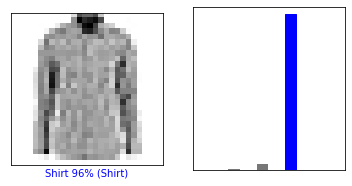

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)


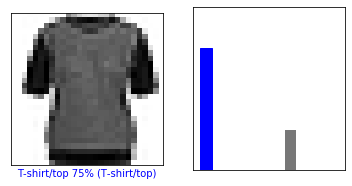

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

(28, 28, 1)
(1, 28, 28, 1)
[[1.16434378e-04 1.02738994e-07 5.24604693e-03 8.49418429e-05
  3.55783999e-02 9.36721426e-06 9.58949029e-01 2.19725589e-08
  1.55750386e-05 2.07531858e-08]]


6

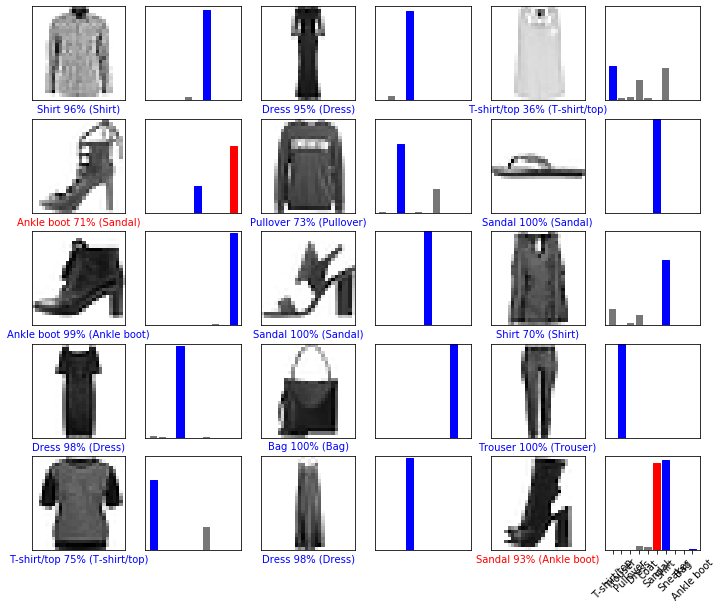

In [29]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
    
img = test_images[0]
print(img.shape)
img = np.array([img])
print(img.shape)
predictions_single = model.predict(img)

print(predictions_single)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])